### Decision Tree:  Red wide quality
    

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
url = '/kaggle/input/winequality-red/winequality-red.csv'
df = pd.read_csv(url)
df.head(10)
# quality 0 = Bad, 1 = Good

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [4]:
# เปลี่ยนข้อมูลใน column 'quality' ให้ 0 = 'bad',1 ='good'
df['quality'] = df['quality'].replace({0: 'bad',1: 'good'})
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [6]:
# เปลี่ยน datatype column'quality' จาก int เป็น object
df['quality'] = df['quality'].astype(object)

In [7]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

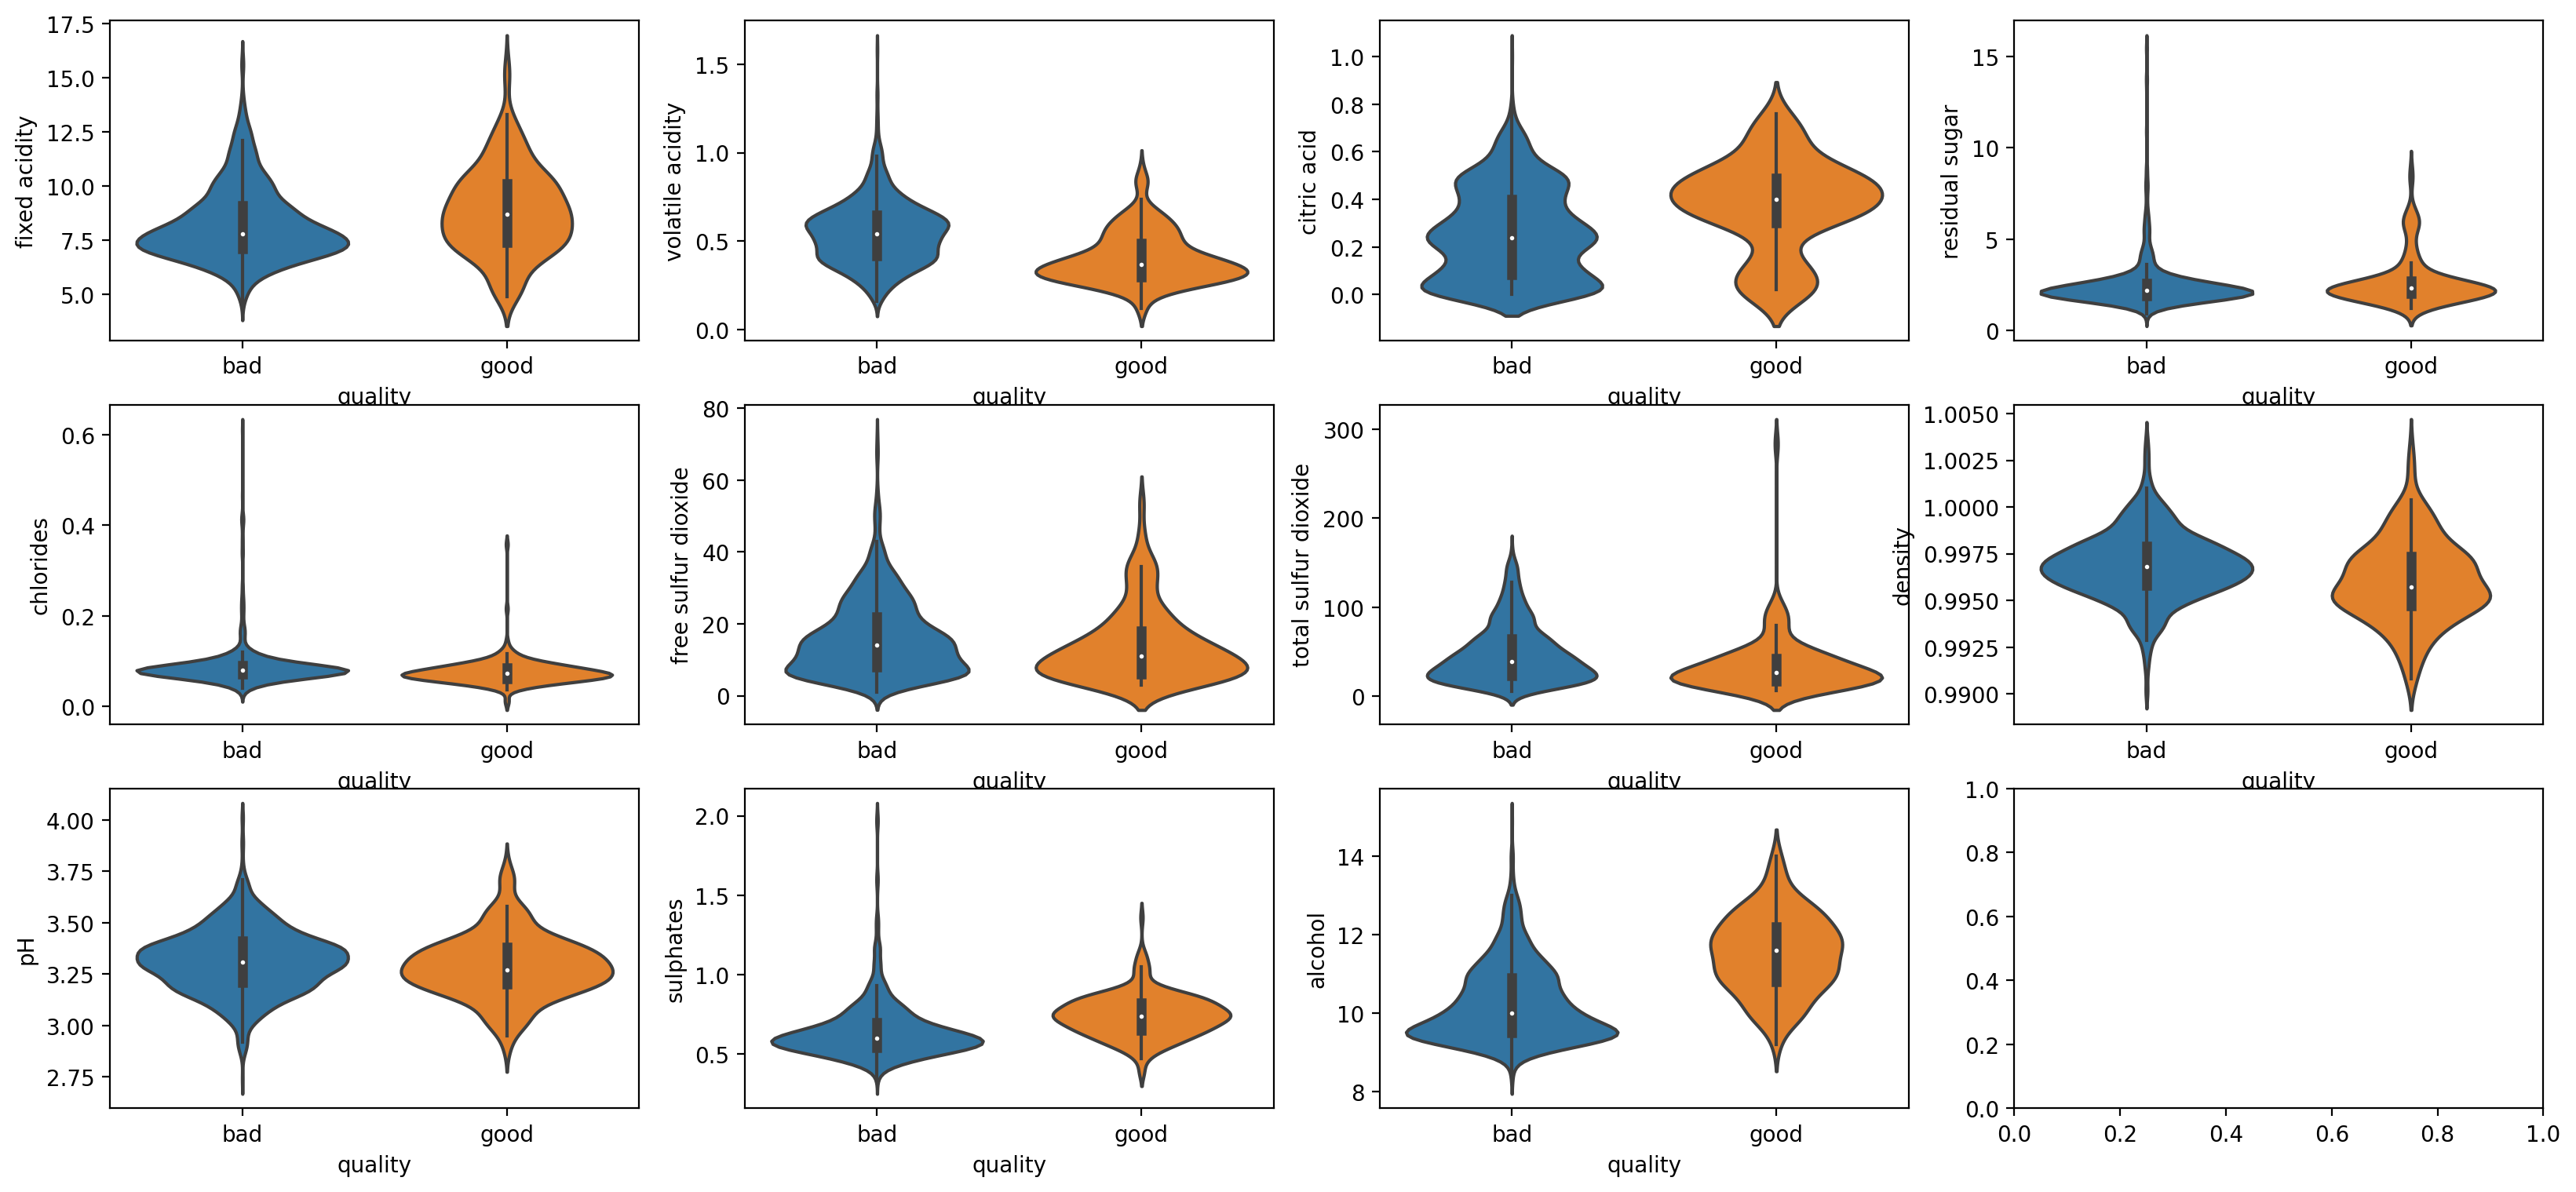

In [9]:
# plot ดู label ในแต่ละ feature
fig, ax = plt.subplots(nrows = 3, ncols = 4, figsize = (20,9))
ax = ax.ravel()
for i, col in enumerate(cols):
    sns.violinplot(x = 'quality' , y = col,data = df,ax =ax[i])

### Decision Tree

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [11]:
x = df[cols] # features
y = df['quality'] # label

In [12]:
test_size = 0.2
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                   test_size = test_size,
                                                   stratify = y,
                                                   random_state = 7)

In [13]:
# สัดส่วน feature ที่ไป train และ test
x_train.shape, x_test.shape

((1279, 11), (320, 11))

In [14]:
x_train.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [15]:
y_train.value_counts()

bad     1105
good     174
Name: quality, dtype: int64

In [16]:
y_test.value_counts()

bad     277
good     43
Name: quality, dtype: int64

## 1. Using criterion gini index

In [17]:
model_gini = DecisionTreeClassifier(criterion = 'gini',max_depth = 3, random_state = 0) # คำนวน Root note โดยใช้วิธี gini
#model = DecisionTreeClassifier(criterion = 'entropy')

#fit the model
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [18]:
model_gini.feature_importances_ # check ว่า model ใช้ตัวแปรไหนบ้าง ตัวแปรไหนค่าเยอะแสดงว่าสำคัญเยอะ

array([0.        , 0.13417393, 0.        , 0.        , 0.        ,
       0.08184649, 0.04750875, 0.        , 0.        , 0.15728007,
       0.57919076])

In [19]:
importances = pd.Series(model_gini.feature_importances_, index = x_train.columns).sort_values(ascending = False)
importances # ค่าของตัวแปรที่ส่งผลต่อการทำนายของ model ตัวแปรไหนค่าเยอะแสดงว่าสำคัญเยอะ

alcohol                 0.579191
sulphates               0.157280
volatile acidity        0.134174
free sulfur dioxide     0.081846
total sulfur dioxide    0.047509
fixed acidity           0.000000
citric acid             0.000000
residual sugar          0.000000
chlorides               0.000000
density                 0.000000
pH                      0.000000
dtype: float64

#### Visualize decision-trees

[Text(0.5, 0.875, 'X[10] <= 11.55\ngini = 0.235\nsamples = 1279\nvalue = [1105, 174]'),
 Text(0.25, 0.625, 'X[1] <= 0.375\ngini = 0.148\nsamples = 1078\nvalue = [991, 87]'),
 Text(0.125, 0.375, 'X[10] <= 10.45\ngini = 0.37\nsamples = 192\nvalue = [145, 47]'),
 Text(0.0625, 0.125, 'gini = 0.165\nsamples = 99\nvalue = [90, 9]'),
 Text(0.1875, 0.125, 'gini = 0.483\nsamples = 93\nvalue = [55, 38]'),
 Text(0.375, 0.375, 'X[10] <= 9.85\ngini = 0.086\nsamples = 886\nvalue = [846, 40]'),
 Text(0.3125, 0.125, 'gini = 0.013\nsamples = 443\nvalue = [440, 3]'),
 Text(0.4375, 0.125, 'gini = 0.153\nsamples = 443\nvalue = [406, 37]'),
 Text(0.75, 0.625, 'X[9] <= 0.685\ngini = 0.491\nsamples = 201\nvalue = [114, 87]'),
 Text(0.625, 0.375, 'X[6] <= 15.5\ngini = 0.382\nsamples = 109\nvalue = [81, 28]'),
 Text(0.5625, 0.125, 'gini = 0.5\nsamples = 28\nvalue = [14, 14]'),
 Text(0.6875, 0.125, 'gini = 0.286\nsamples = 81\nvalue = [67, 14]'),
 Text(0.875, 0.375, 'X[5] <= 18.5\ngini = 0.46\nsamples = 92\nval

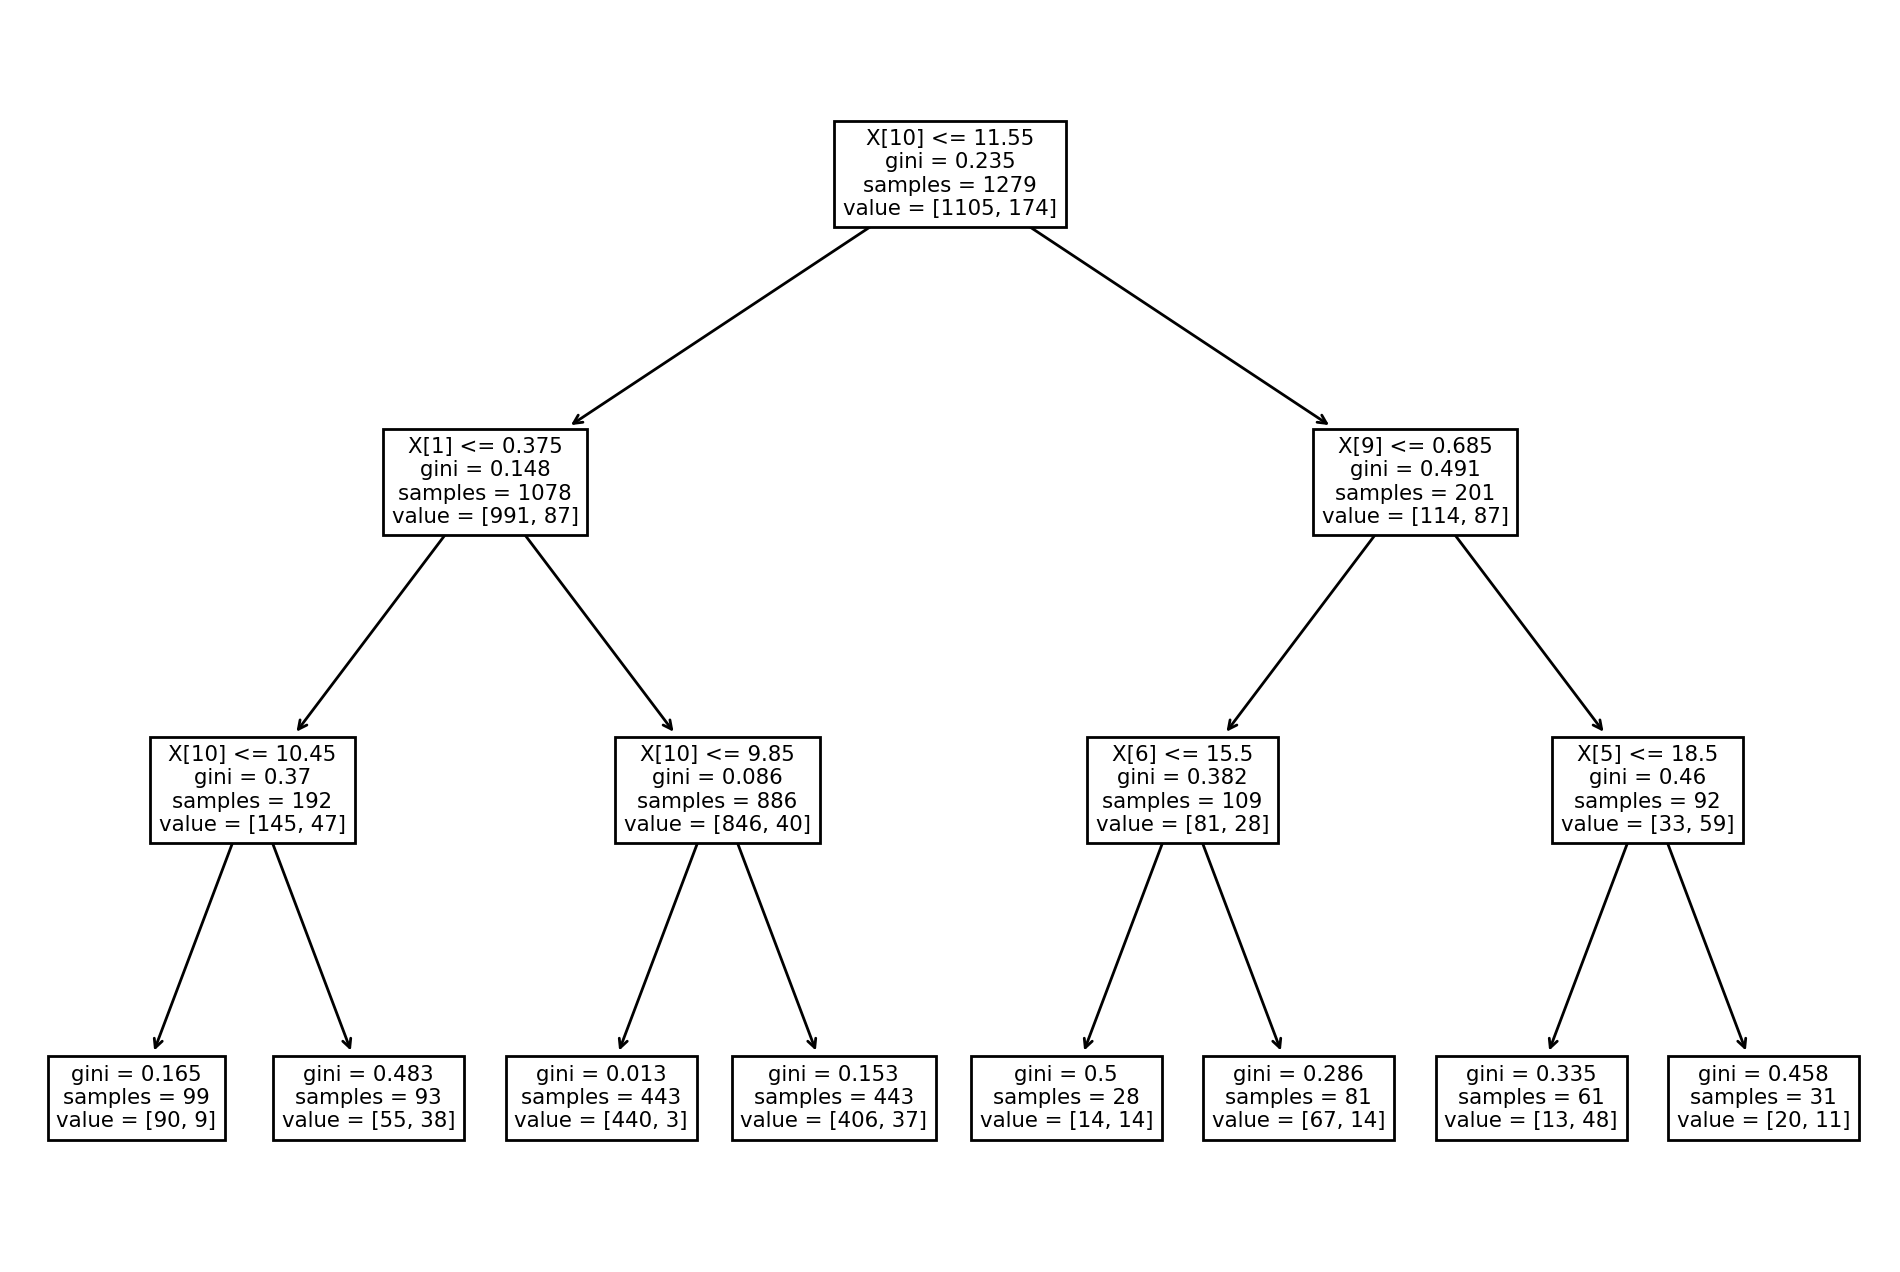

In [20]:
plt.figure(figsize = (12,8))
from sklearn import tree 
tree.plot_tree(model_gini.fit(x_train, y_train))

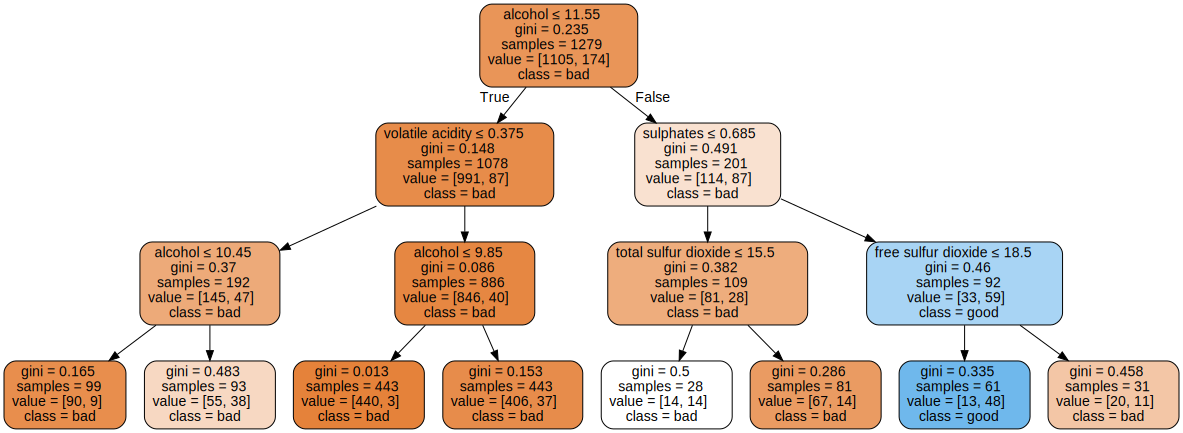

In [21]:
import graphviz
dot_data = tree.export_graphviz(model_gini, out_file = None,
                               feature_names = x_train.columns.tolist(),
                               class_names = ['bad','good'],
                               filled = True, rounded = True,
                               special_characters = True)

graph = graphviz.Source(dot_data)
graph

#### Plot 3D

In [22]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

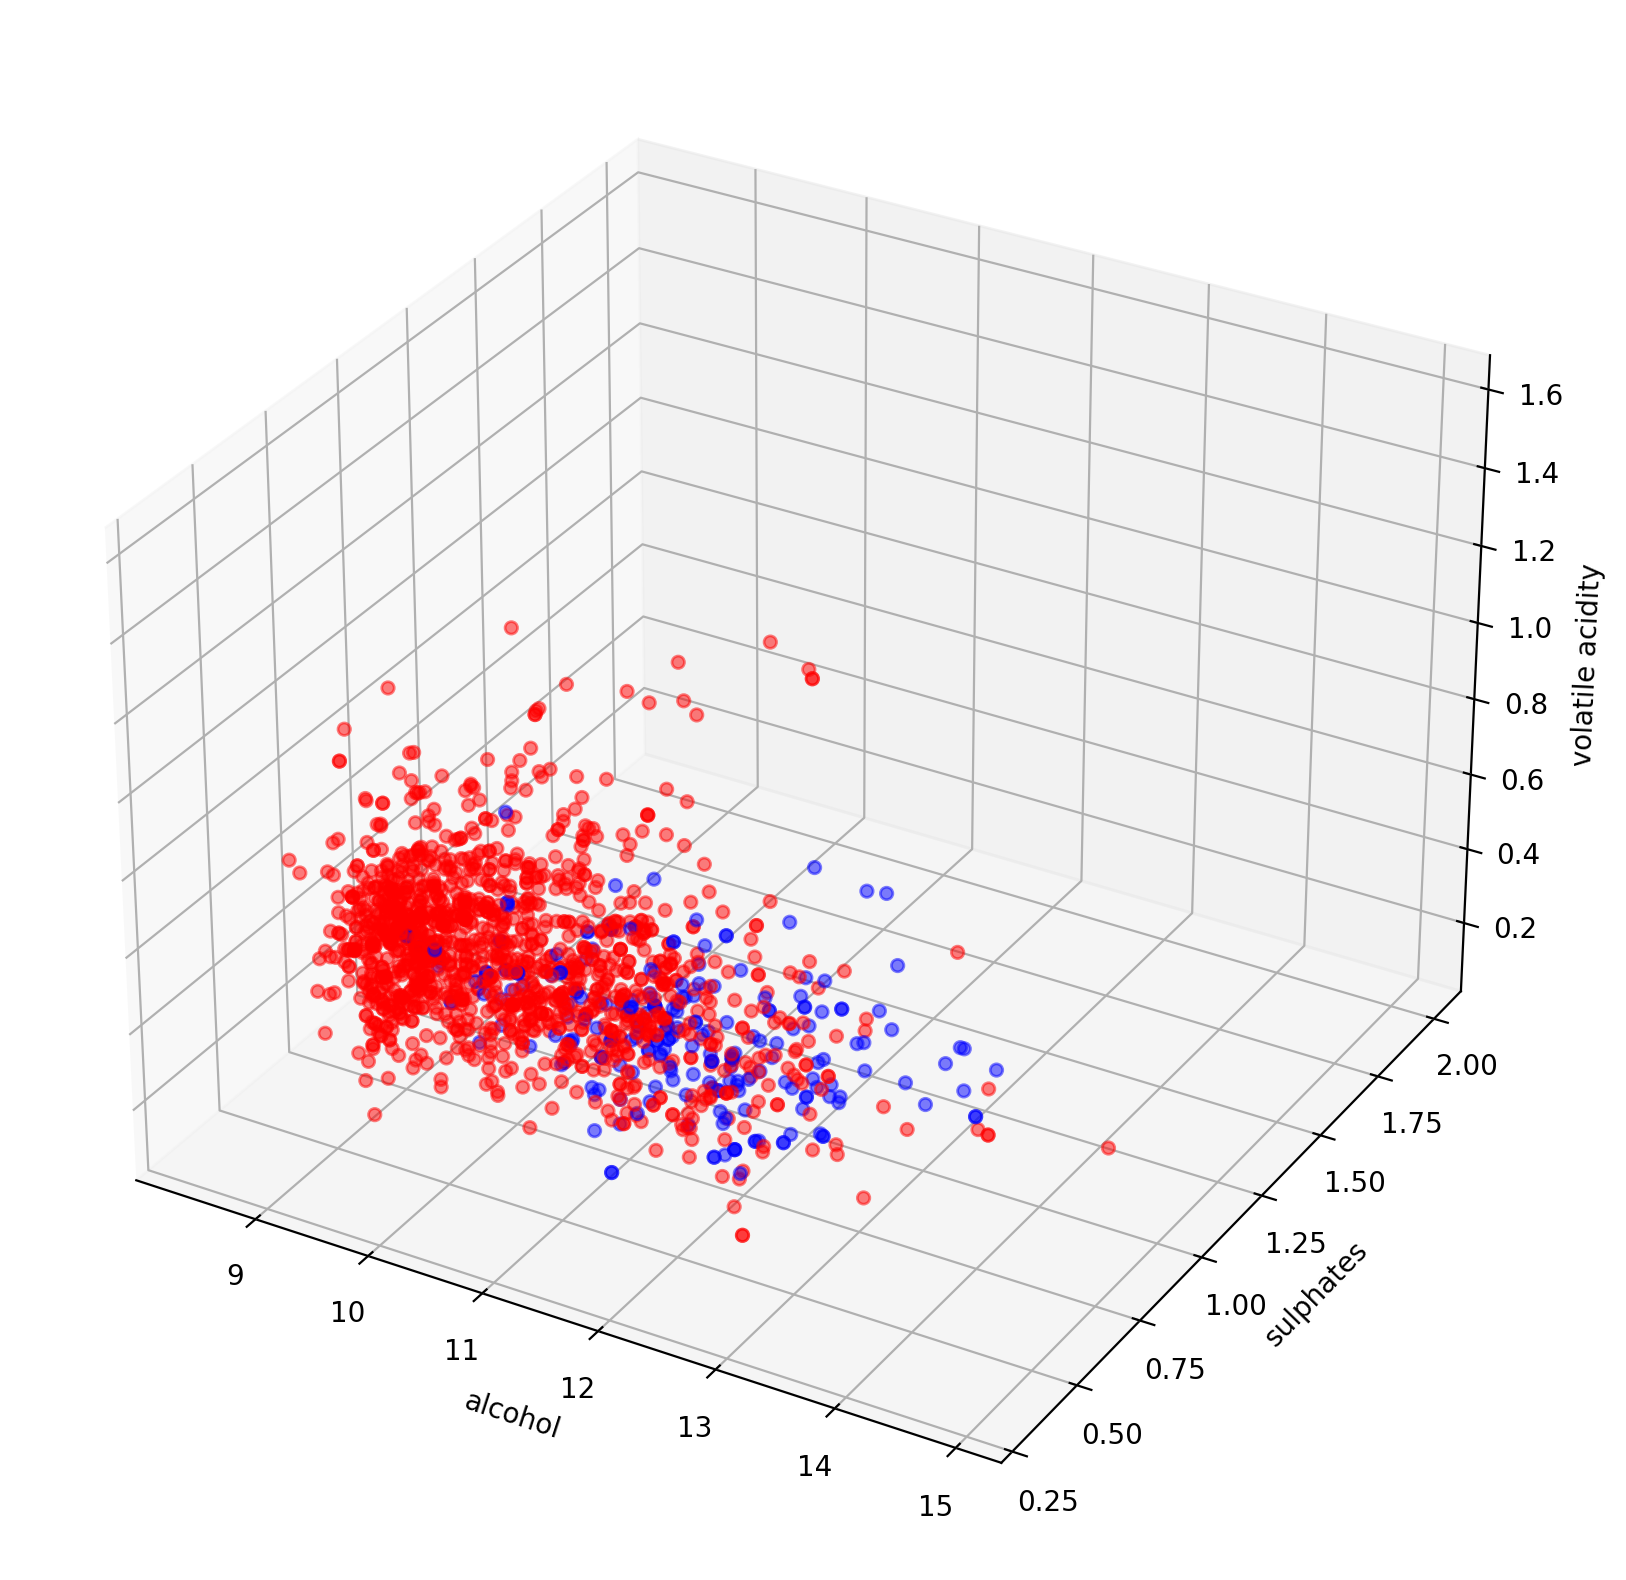

In [23]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection = '3d')
colors = y.map({'bad':'red','good':'blue'})
ax.scatter(x['alcohol'],x['sulphates'],x['volatile acidity'], alpha = .5, c = colors)
ax.set_xlabel('alcohol')
ax.set_ylabel('sulphates')
ax.set_zlabel('volatile acidity');

#### Predict the Test set with gini index

In [24]:
y_pred_gini = model_gini.predict(x_test)

#### Check accuracy score with criterion gini index

In [25]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8906


#### train-set and test-set accuracy

In [26]:
y_pred_train_gini = model_gini.predict(x_train)
y_pred_train_gini

array(['bad', 'bad', 'bad', ..., 'bad', 'bad', 'bad'], dtype=object)

#### Check for overfitting and underfitting

In [27]:
print('Training set score: {:.4f}'.format(model_gini.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(model_gini.score(x_test, y_test)))
# ค่าทั้งสองไม่แตกต่างกันมากจึงไม่ overfitting

Training set score: 0.8913
Test set score: 0.8906


## 2. Using criterion entropy

In [28]:
model_en = DecisionTreeClassifier(criterion = 'entropy',max_depth = 3, random_state = 0) # คำนวน Root note โดยใช้วิธี gini
#model = DecisionTreeClassifier(criterion = 'entropy')

#fit the model
model_en.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [29]:
model_en.feature_importances_ # check ว่า model ใช้ตัวแปรไหนบ้าง ตัวแปรไหนค่าเยอะแสดงว่าสำคัญเยอะ

array([0.08187611, 0.15545901, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.10291458,
       0.65975031])

In [30]:
importances = pd.Series(model_en.feature_importances_, index = x_train.columns).sort_values(ascending = False)
importances # ค่าของตัวแปรที่ส่งผลต่อการทำนายของ model ตัวแปรไหนค่าเยอะแสดงว่าสำคัญเยอะ

alcohol                 0.659750
volatile acidity        0.155459
sulphates               0.102915
fixed acidity           0.081876
citric acid             0.000000
residual sugar          0.000000
chlorides               0.000000
free sulfur dioxide     0.000000
total sulfur dioxide    0.000000
density                 0.000000
pH                      0.000000
dtype: float64

#### Visualize decision-trees

[Text(0.5, 0.875, 'X[10] <= 10.45\nentropy = 0.574\nsamples = 1279\nvalue = [1105, 174]'),
 Text(0.25, 0.625, 'X[0] <= 11.55\nentropy = 0.213\nsamples = 739\nvalue = [714, 25]'),
 Text(0.125, 0.375, 'X[10] <= 9.975\nentropy = 0.15\nsamples = 694\nvalue = [679, 15]'),
 Text(0.0625, 0.125, 'entropy = 0.051\nsamples = 520\nvalue = [517, 3]'),
 Text(0.1875, 0.125, 'entropy = 0.362\nsamples = 174\nvalue = [162, 12]'),
 Text(0.375, 0.375, 'X[9] <= 0.655\nentropy = 0.764\nsamples = 45\nvalue = [35, 10]'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 21\nvalue = [21, 0]'),
 Text(0.4375, 0.125, 'entropy = 0.98\nsamples = 24\nvalue = [14, 10]'),
 Text(0.75, 0.625, 'X[1] <= 0.425\nentropy = 0.85\nsamples = 540\nvalue = [391, 149]'),
 Text(0.625, 0.375, 'X[9] <= 0.725\nentropy = 0.986\nsamples = 235\nvalue = [134, 101]'),
 Text(0.5625, 0.125, 'entropy = 0.882\nsamples = 123\nvalue = [86, 37]'),
 Text(0.6875, 0.125, 'entropy = 0.985\nsamples = 112\nvalue = [48, 64]'),
 Text(0.875, 0.375, 'X[10] <

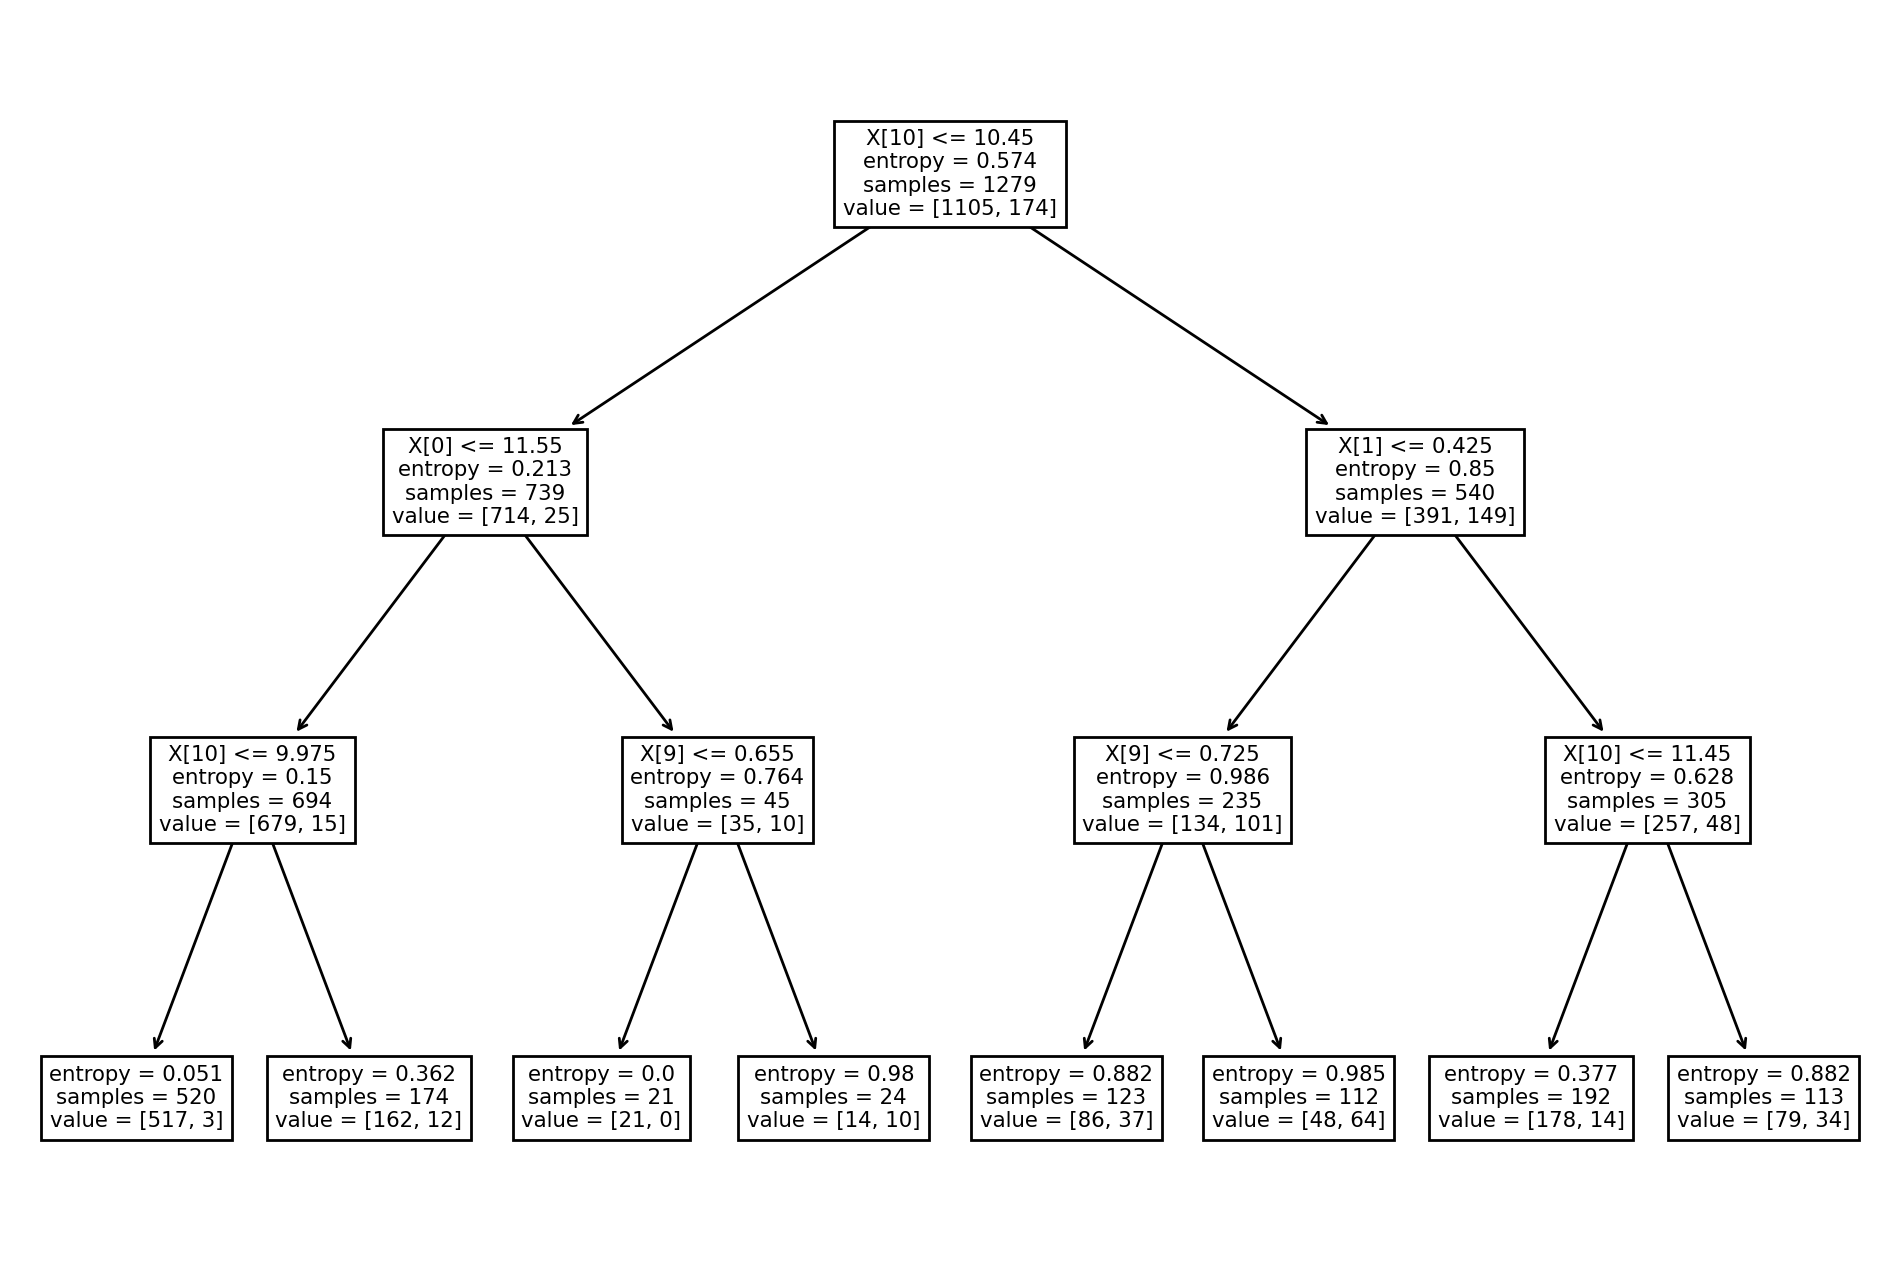

In [31]:
plt.figure(figsize = (12,8))
from sklearn import tree 
tree.plot_tree(model_en.fit(x_train, y_train))

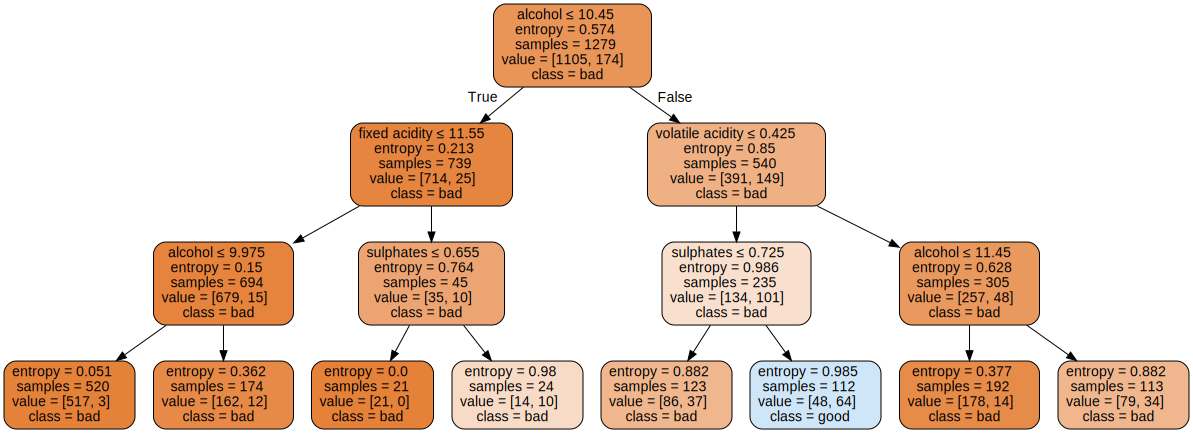

In [32]:
import graphviz
dot_data = tree.export_graphviz(model_en, out_file = None,
                               feature_names = x_train.columns.tolist(),
                               class_names = ['bad','good'],
                               filled = True, rounded = True,
                               special_characters = True)

graph = graphviz.Source(dot_data)
graph

#### Predict the Test set with criterion entropy

In [33]:
y_pred_en = model_en.predict(x_test)

#### Plot 3D

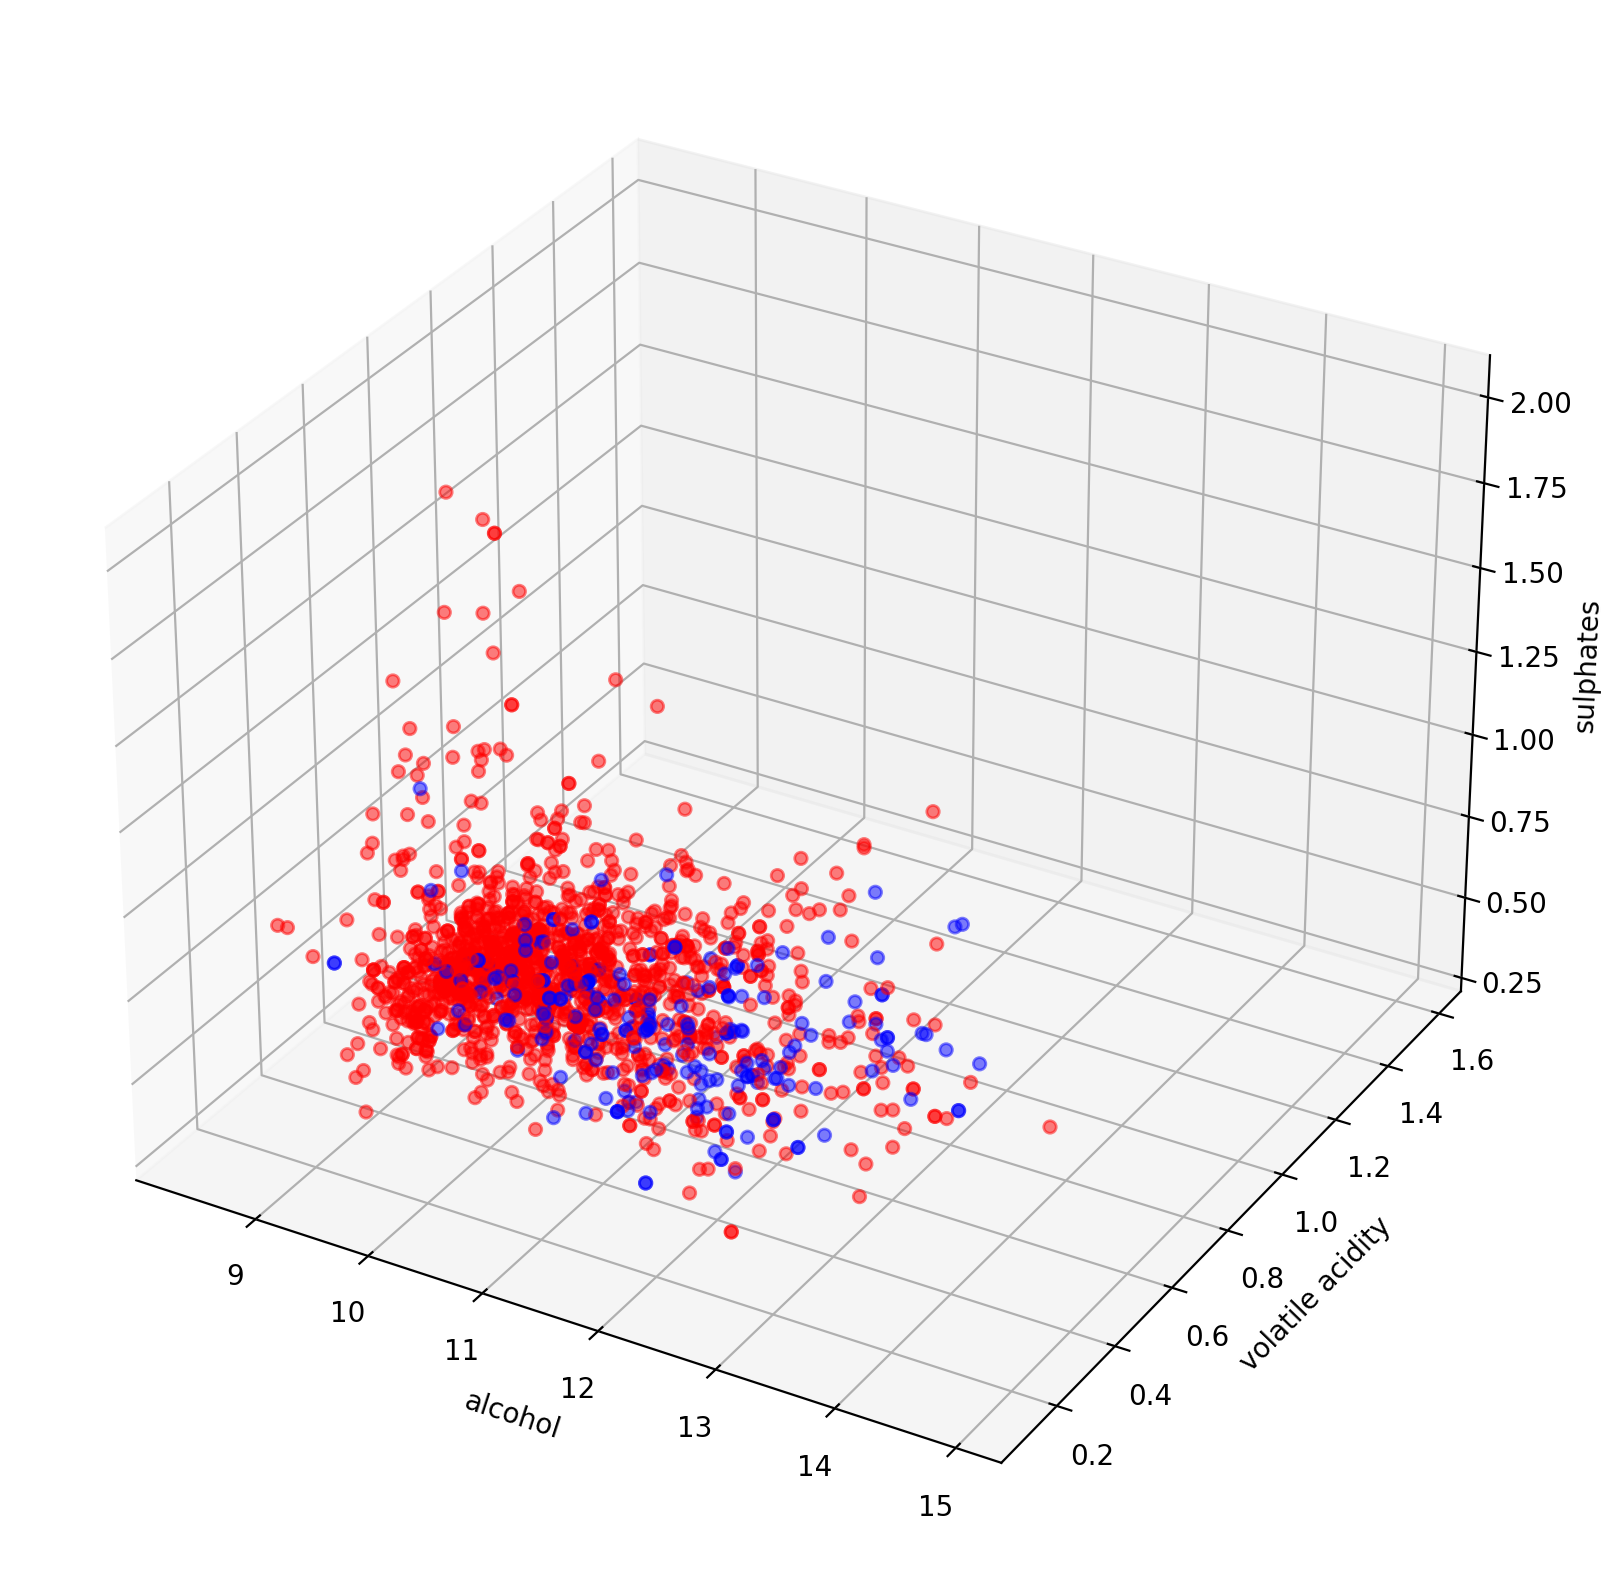

In [34]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection = '3d')
colors = y.map({'bad':'red','good':'blue'})
ax.scatter(x['alcohol'],x['volatile acidity'],x['sulphates'], alpha = .5, c = colors)
ax.set_xlabel('alcohol')
ax.set_ylabel('volatile acidity')
ax.set_zlabel('sulphates');

#### Check accuracy score with criterion entropy

In [35]:
print('Model accuracy score with criterion criterion entropy: {0:0.4f}'.format(accuracy_score(y_test, y_pred_en)))
# ค่า accuracy ของ model ที่ใช้ Gini เท่ากับ 0.8906 

Model accuracy score with criterion criterion entropy: 0.8812


#### train-set and test-set accuracy

In [36]:
y_pred_train_en = model_en.predict(x_train)
y_pred_train_en

array(['bad', 'bad', 'good', ..., 'bad', 'bad', 'bad'], dtype=object)

#### Check for overfitting and underfitting

In [37]:
print('Training set score: {:.4f}'.format(model_en.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(model_en.score(x_test, y_test)))
# ค่าทั้งสองไม่แตกต่างกันมากจึงไม่ overfitting

Training set score: 0.8765
Test set score: 0.8812


## Confusion Matrix

- True Positives (TP)  = 274
- True Negatives (TN)  = 11
- False Positives (FP) = 32
- False Negatives (FN) = 3

In [38]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_gini)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[274   3]
 [ 32  11]]


<function matplotlib.pyplot.show(close=None, block=None)>

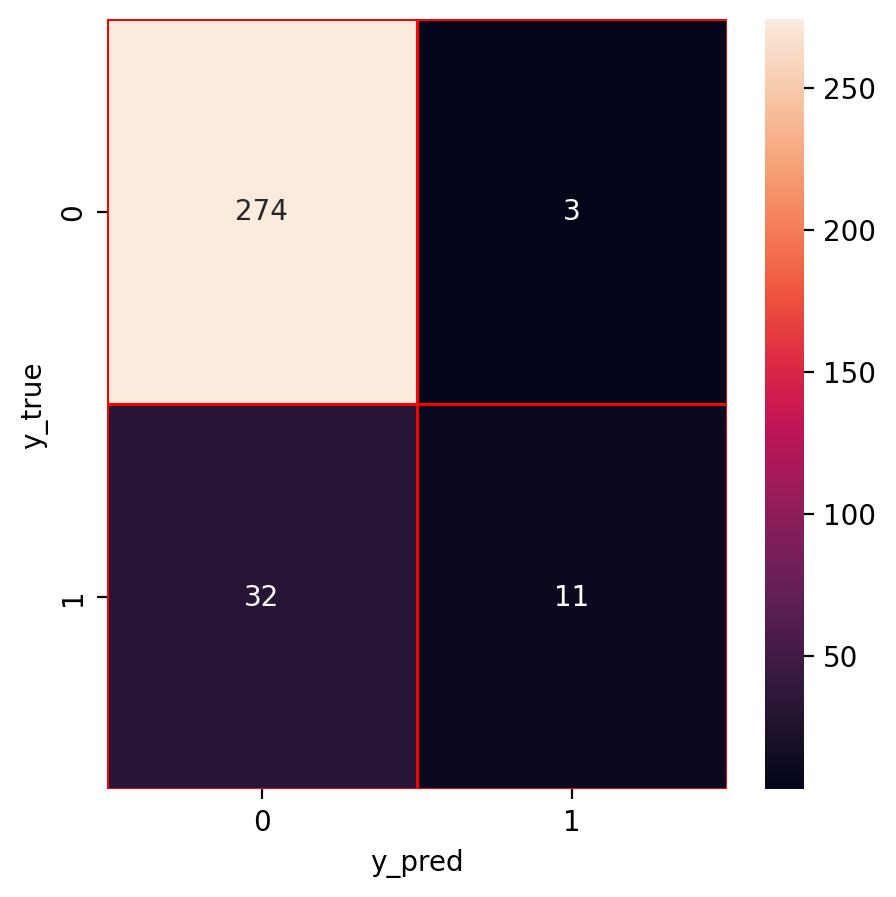

In [39]:
#confusion matrix visualization
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot = True, linewidths = 0.5,linecolor = "red",fmt =".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

         bad       0.90      0.99      0.94       277
        good       0.79      0.26      0.39        43

    accuracy                           0.89       320
   macro avg       0.84      0.62      0.66       320
weighted avg       0.88      0.89      0.87       320

